## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


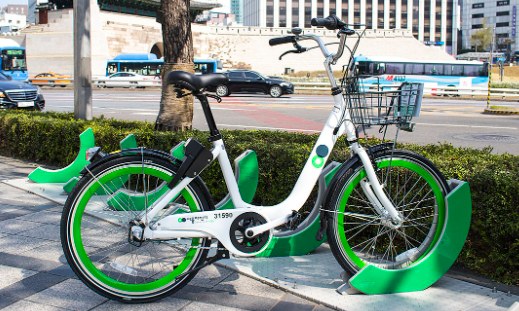

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Data Mounting

In [108]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project/Capstone_Supervised ML_Regression/SeoulBikeData.csv',encoding='ISO-8859-1')

# Data Inspection

In [ ]:
#Top entries of Dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Number of rows and columns
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Duplicates
len(df[df.duplicated()])

0

In [ ]:
#Null values in dataset
df.isna().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

we dont have any null values in dataset

In [ ]:
#Description of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# Exploratory Data Analysis

In [ ]:
#converting to YY-MM-DD format
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
#fetching year from date and storing in column 'Year'
df['Year']=df['Date'].dt.year

In [ ]:
df['Year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Year, Length: 8760, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


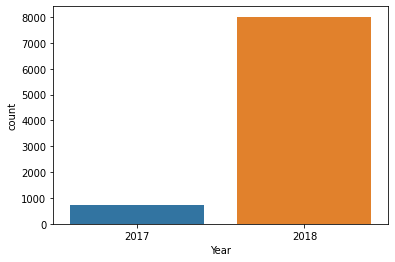

In [ ]:
#countplot of year 
sns.countplot(df['Year'])

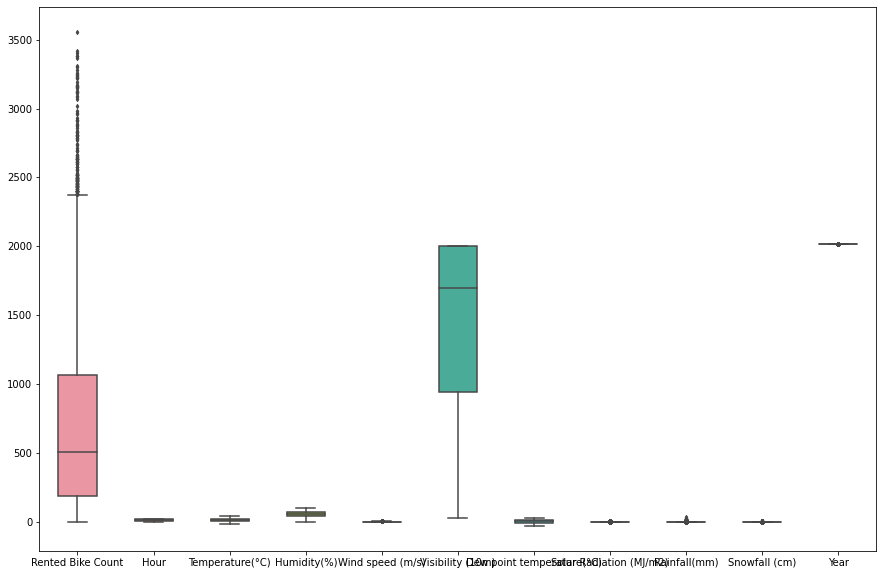

In [ ]:
 # Let's Check for outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df ,width=0.5,ax=ax,fliersize=3)

I have tried to do the Boxplot for different numerical columns.

We can see that the some outliers are in the Rented Bike count.


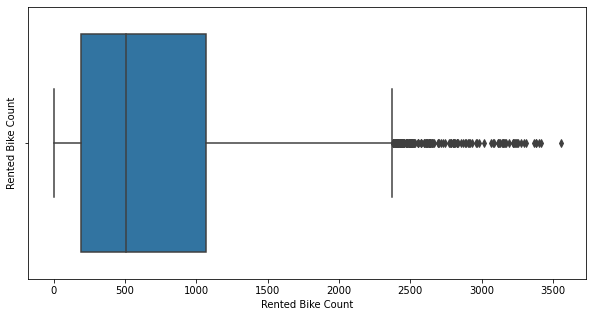

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,5))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

In [ ]:
#Fetching month from column 'Date' and storing in new column
df['Month']=df['Date'].dt.month
df['Month']

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Month, Length: 8760, dtype: int64

In [ ]:
#Fetching day from Date and restoring in new column
df['Day']=df['Date'].dt.day

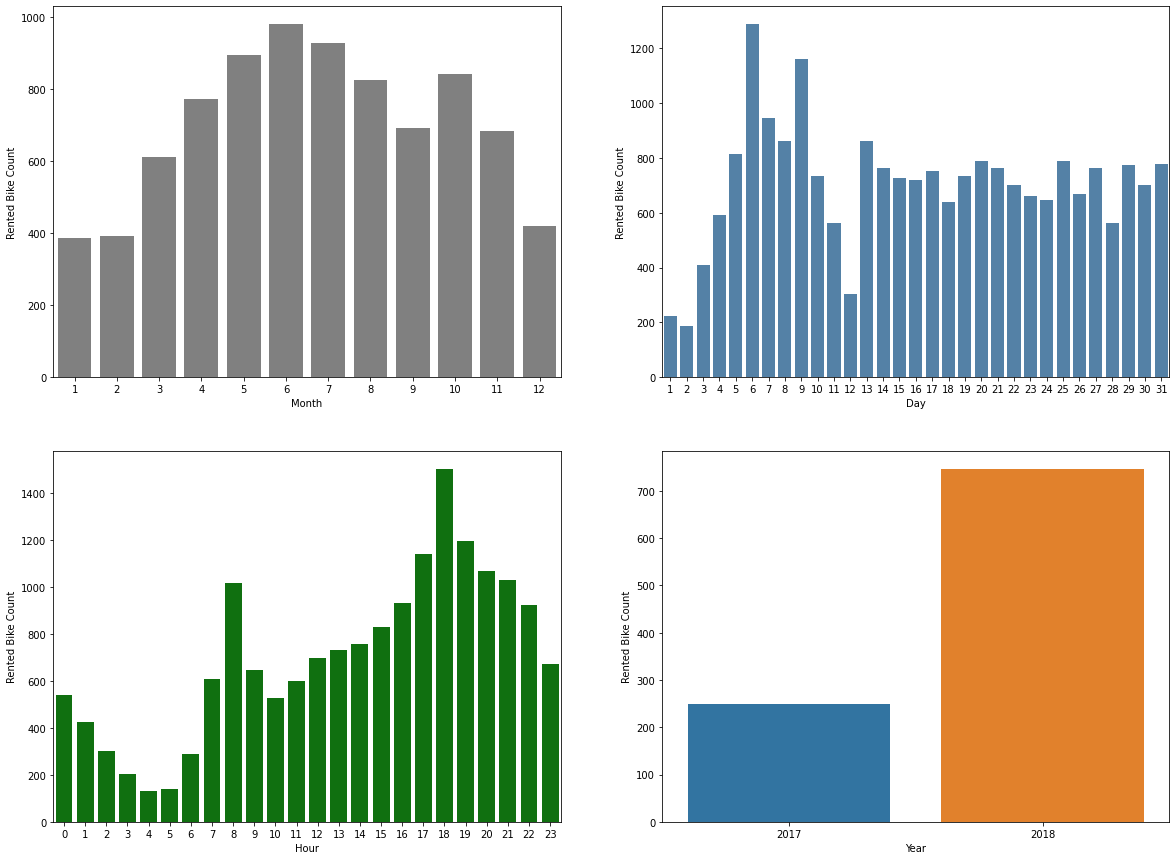

In [ ]:
#bike rent count per Month, Day, Hour, and Year
Month_rent = pd.DataFrame(df.groupby('Month').agg({'Rented Bike Count':'mean'}))
Day_rent = pd.DataFrame(df.groupby('Day').agg({'Rented Bike Count':'mean'}))
Hour_rent = pd.DataFrame(df.groupby('Hour').agg({'Rented Bike Count':'mean'}))
Year_rent = pd.DataFrame(df.groupby('Year').agg({'Rented Bike Count':'mean'}))

fig, ax = plt.subplots(2,2,figsize=(20,15))   
ax1=plt.subplot(2,2 ,1)
sns.barplot(x=Month_rent.index, y = Month_rent['Rented Bike Count'],color='grey')
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Day_rent.index, y = Day_rent['Rented Bike Count'],color='steelblue')
ax1=plt.subplot(2, 2,3)
sns.barplot(x=Hour_rent.index, y = Hour_rent['Rented Bike Count'],color='green')
ax1=plt.subplot(2, 2,4)
sns.barplot(x=Year_rent.index, y = Year_rent['Rented Bike Count'])

Spread of Average Rented Bike Count over different Month, Day, Hour and year are plotted.

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

IndexError: ignored

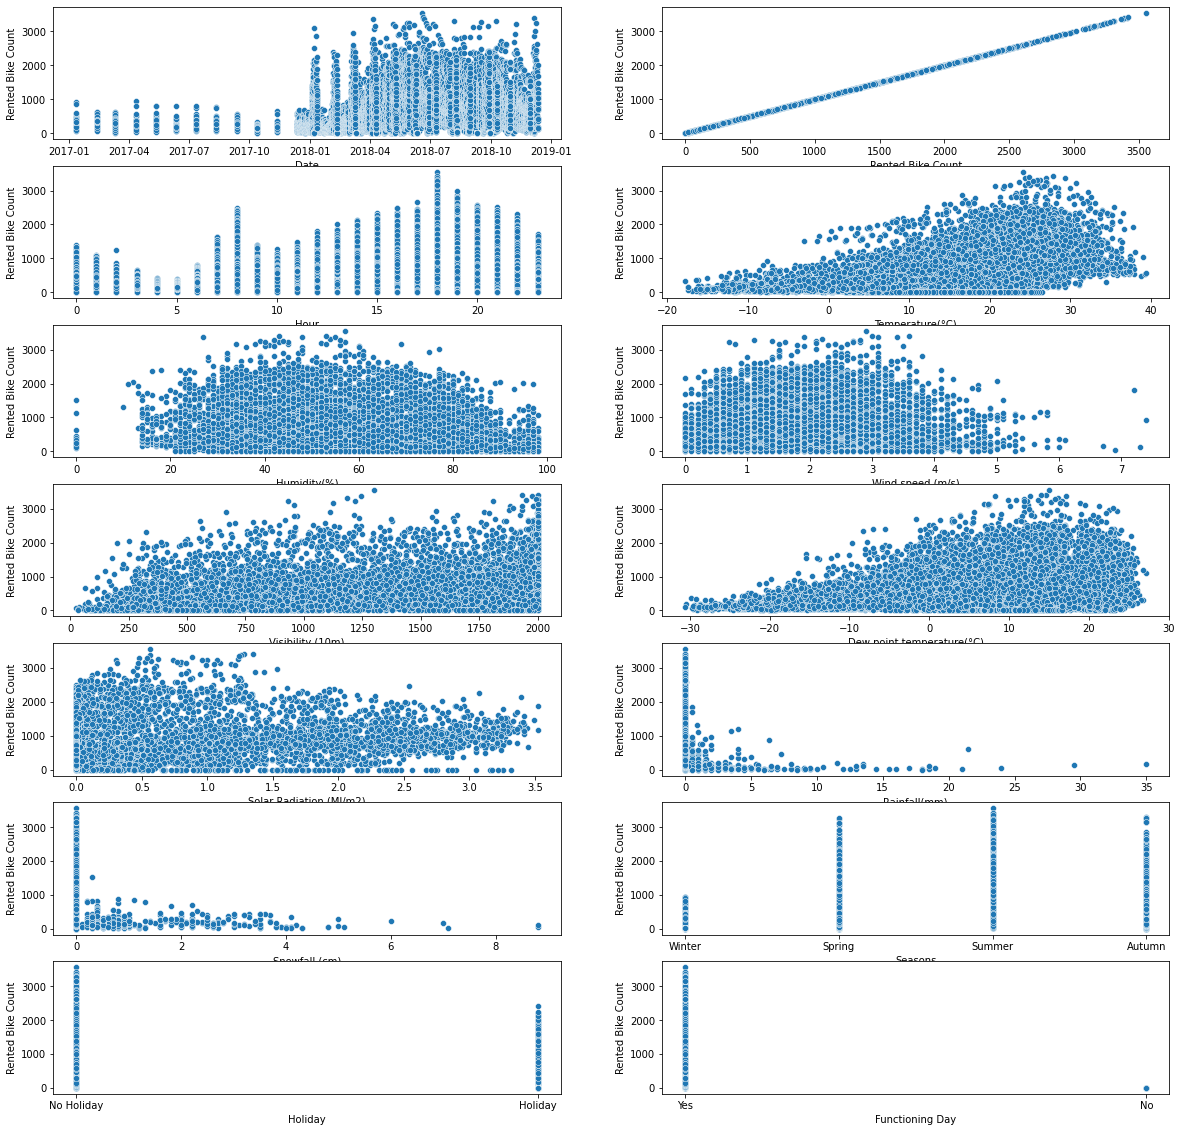

In [ ]:
## Generating 2*5 matrix of box plots
fig, axes = plt.subplots(7, 2, figsize = (20,20))
axes = axes.flatten()

for i in range(0,len(df.columns)-1):
    sns.scatterplot(x=df.iloc[:,i], y='Rented Bike Count', data=df,ax=axes[i])

plt.tight_layout()
plt.show()

 ## Insights #1
1. There are high demand of bike during 15th to 20th Hours.

2. There are higher demand during temperatures of 20 to 30 degree celcius which is  corroborated by the count numbers in Spring & Summer seasons.

3. People tend to use bike more between the humidity 30% to 60%  and due point of 5 to 20.

4. Rainfall and slowfall have inverse relation with the Rented count of bikes.

5. People tend to use Rented Bike more on No holidays period than Holidays.

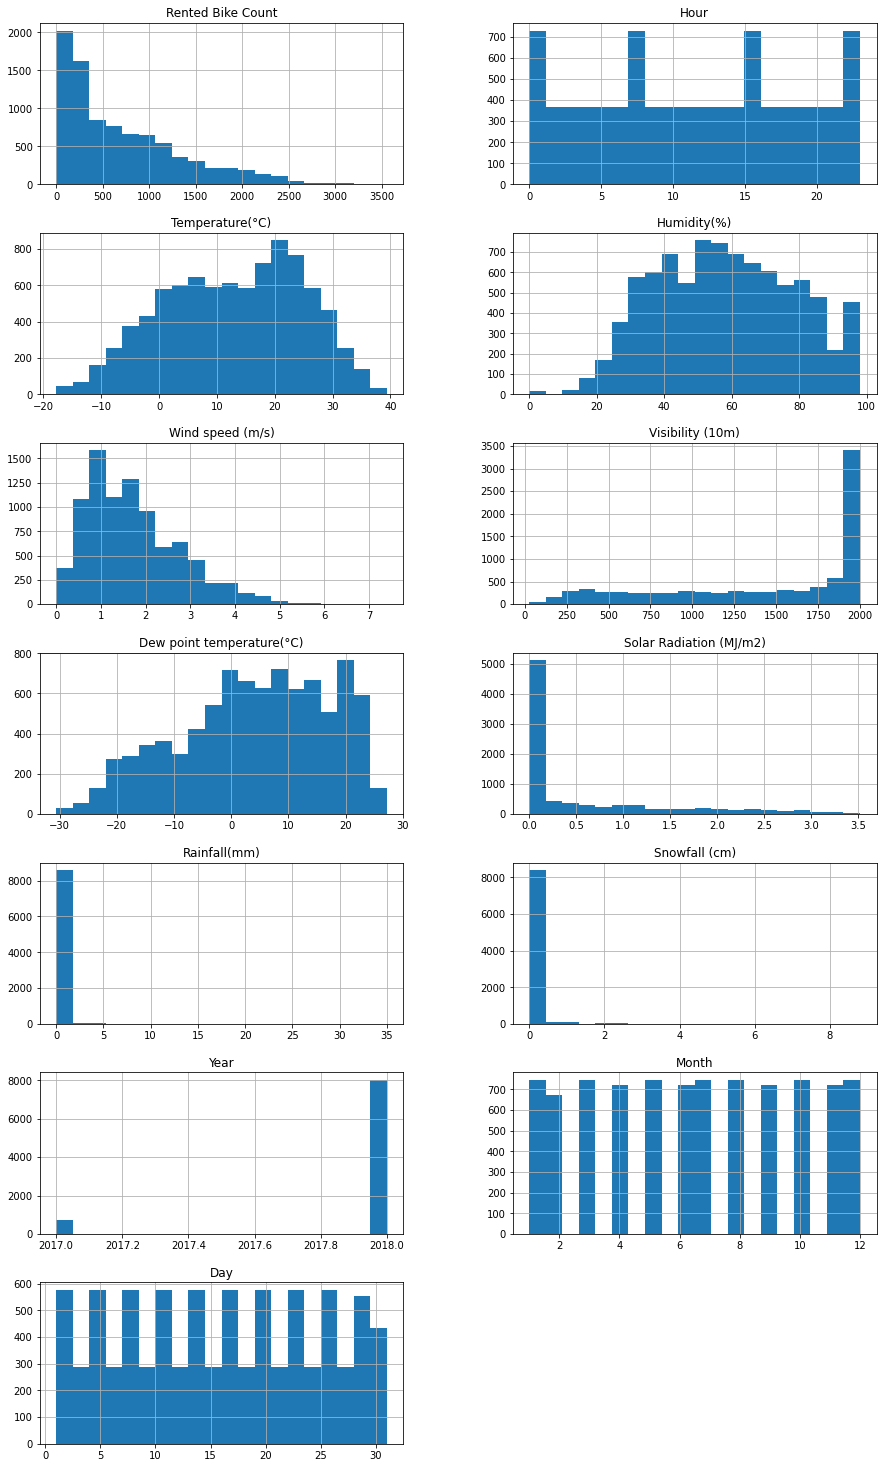

In [ ]:
#histogram plot of all variables
df.hist(bins=20,figsize=(15,30),layout=(8,2)) 
plt.show()

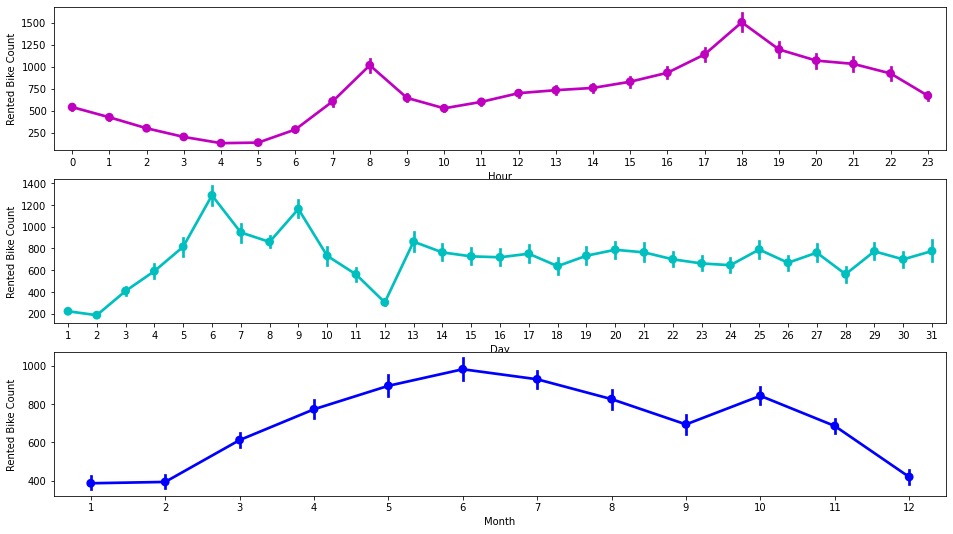

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(16,9))
sns.pointplot(x='Hour',y='Rented Bike Count',data =df,ax=axs[0],color='m')
sns.pointplot(x='Day',y='Rented Bike Count',data =df,ax=axs[1],color='c')
sns.pointplot(x='Month',y='Rented Bike Count',data =df,ax=axs[2],color='b')

 ## Insights #2
1. Here we can see the spread of Rented Bike count over different years, Month and Days.
2. There are clear spike in Rented Bike count during the 8th and 18th Hours of  a day, 5th to 8th & 10th Month of year and 5th , 9th day in a month.


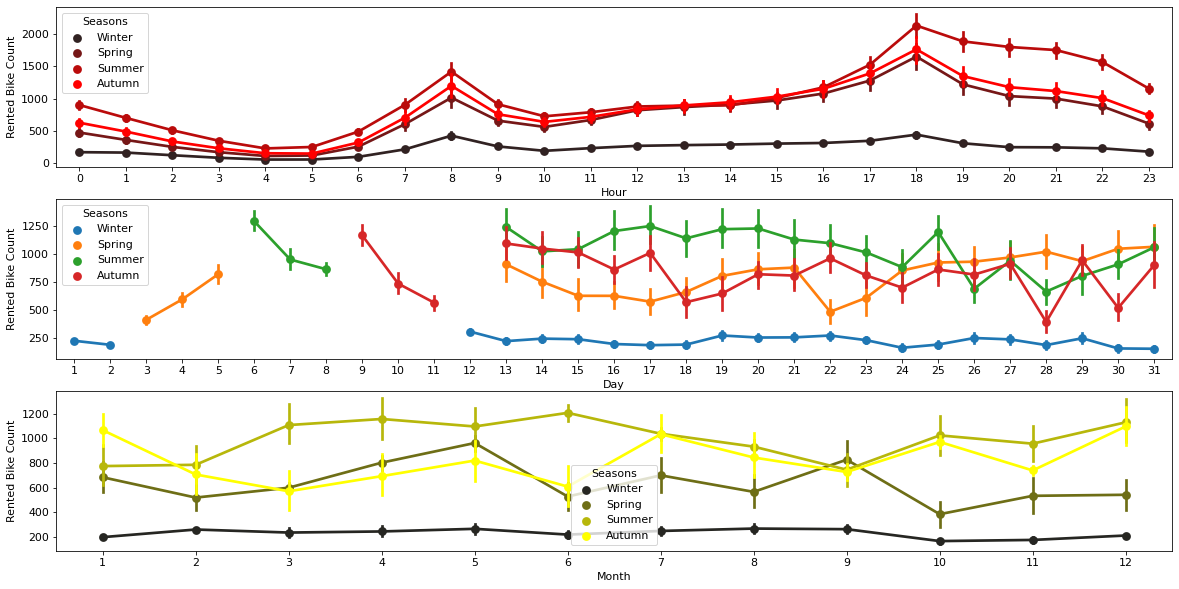

In [ ]:
# let's add a hue of the seasons to understand its spread
#pointplot of Hour, Day, and Month vs Rented bike count in particular seasons
mpl.rc('font', size=11)

figure, axes = plt.subplots(nrows=3,figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',color='red',ax=axes[0])
sns.pointplot(data=df,x='Day',y='Rented Bike Count',hue='Seasons',ax=axes[1])
sns.pointplot(data=df,x='Month',y='Rented Bike Count',hue='Seasons',color='yellow',ax=axes[2])

 ## Insights #3

1. It clearly indicates that Summer times followed by Spring and Autumn  have higher share of Rented Bike count.
2. Winter has smallest Rented Bike count in all hours, day and month.

In [ ]:
# let's analyze the categorical variables
numerics = ['float64', 'int64']
object_ds = df.select_dtypes(exclude = numerics)

In [ ]:
object_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Seasons          8760 non-null   object        
 2   Holiday          8760 non-null   object        
 3   Functioning Day  8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


In [ ]:
object_ds = object_ds.iloc[:,1:]

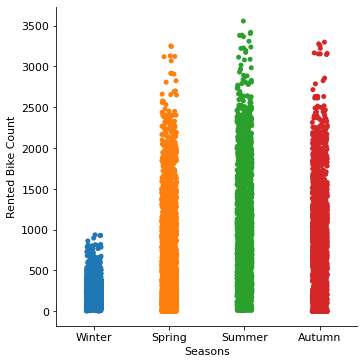

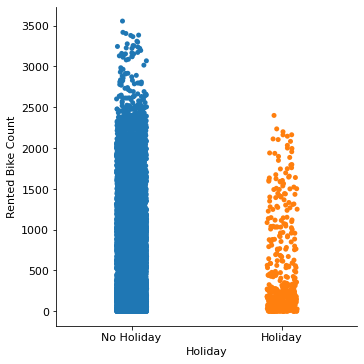

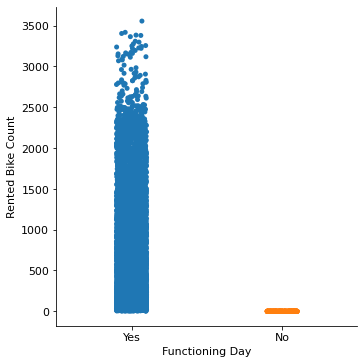

In [ ]:
for col in object_ds.columns:
  sns.catplot(x=col,y='Rented Bike Count', data=df)

We can see that people are using it more in Holiday and Functioning hours and during the Summer, Autumn& Spring time.

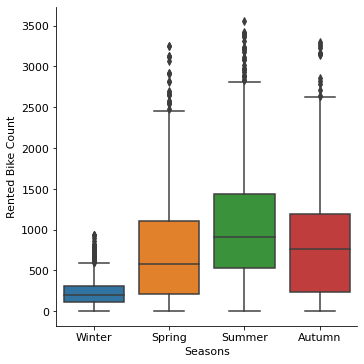

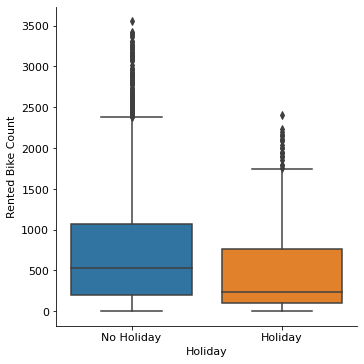

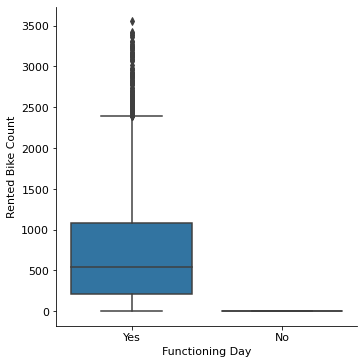

In [ ]:
# let's find out the distributions of observations within the category
for col in object_ds.columns:
  sns.catplot(x=col,y='Rented Bike Count',kind='box', data=df)

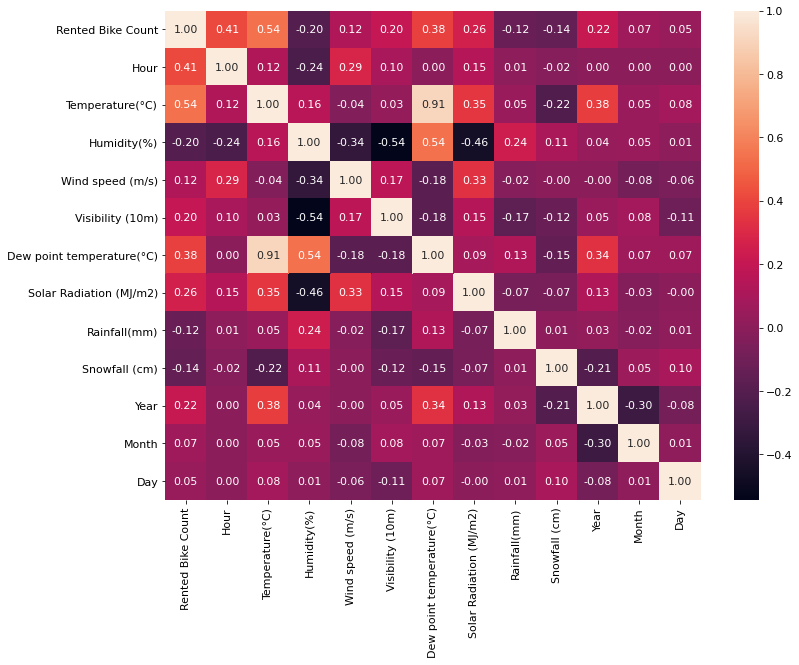

In [ ]:
# Let's find the Correlation among the variables
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(df.corr(), annot = True , fmt=".2f")
plt.show()

## Insights #4
1. We can see that Dew Point, Hour, Temperature and Solar radiation has correlation with our dependent variable rented  bike count.

2. There are very high correlation among the independent variable Dew point and temperature. We can remove one column as both denotes same phenomena.

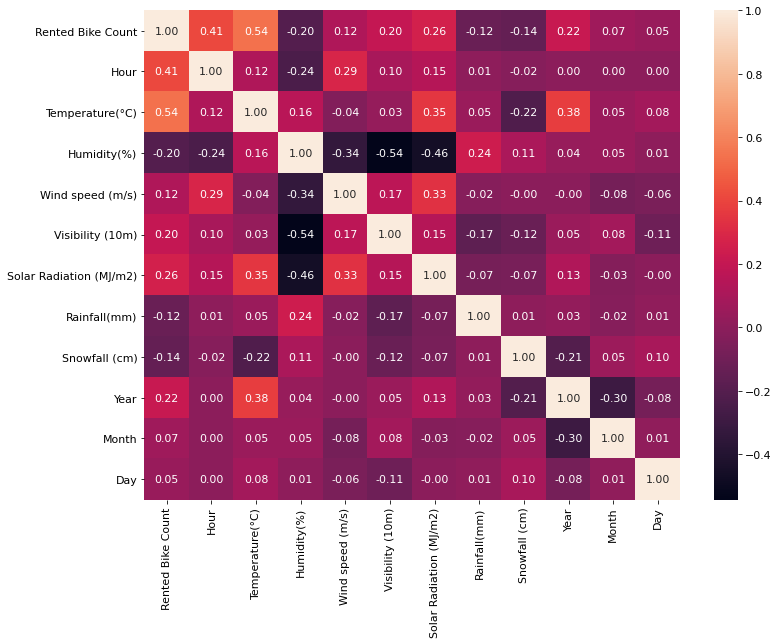

In [ ]:
df = df.drop(['Dew point temperature(°C)'],axis=1)
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(df.corr(), annot = True , fmt=".2f")
plt.show()

## Insights #5
The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.  

# Data Preparation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


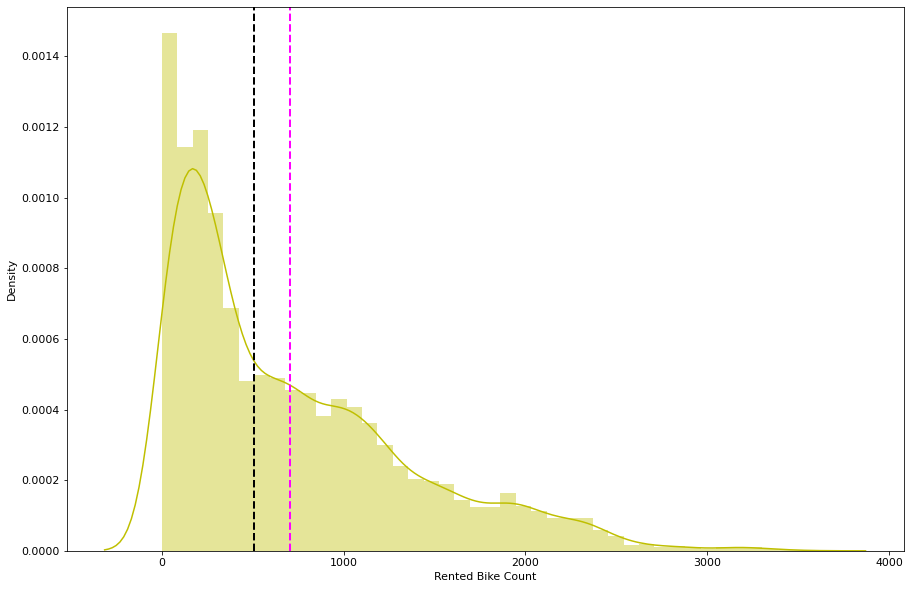

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(15,10))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(np.mean(df['Rented Bike Count']), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


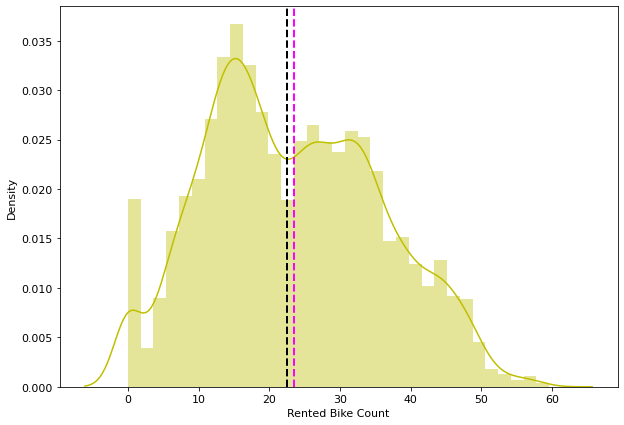

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.mean(np.sqrt(df['Rented Bike Count'])), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()


After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution

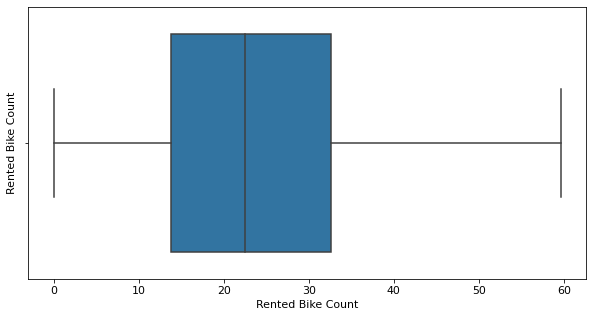

In [ ]:
#Cross verifiaction to cehck wheater we still have outliers 
plt.figure(figsize=(10,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

The above boxplot shows that we have removed the outliers in dependent variable.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
df[object_ds.columns]= df[object_ds.columns].apply(lambda x:encode.fit_transform(x))

In [ ]:
# renaming the columns by removing their units.
df.rename({"Temperature(°C)": "Temperature",  "Functioning Day":"Functioning_Day","Humidity(%)": "Humidity",   "Wind speed (m/s)": "Wind_speed","Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature", "Solar Radiation (MJ/m2)": "Solar_Radiation", "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall", "Rented Bike Count": "Rented_Bike_Count"},   axis = "columns", inplace = True) 

In [ ]:
#Checking multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Dependent variable
y = np.sqrt(df['Rented_Bike_Count'])

In [ ]:
# Independent variable
from scipy.stats import zscore
X = (df.drop(labels=['Rented_Bike_Count','Date'],axis=1)).apply(zscore)

In [ ]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,2017,1,12


In [ ]:
#statistical summary of dataset
import statsmodels.api as sm
X = sm.add_constant(X) 
model = sm.OLS(np.sqrt(y), X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        06:42:02   Log-Likelihood:                -10113.
No. Observations:                8760   AIC:                         2.026e+04
Df Residuals:                    8745   BIC:                         2.036e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6029      0.008    560.732      0.000       4.587       4.619
Hour                0.3297      0.009     36.859      0.000       0.312       0.347
Temperature         0.7007      0.011     62.159      0.000       0.679       0.723
Humidity           -0.3465      0.013    -26.114      0.000      -0.372      -0.320
Wind_speed         -0.0021      0.009     -0.220      0.826      -0.020       0.016
Visibility          0.0202      0.010      1.930      0.054      -0.000       0.041
Solar_Radiation    -0.0629      0.011     -5.491      0.000      -0.085      -0.040
Rainfall           -0.2230      0.008    -26.245      0.000      -0.240      -0.206
Snowfall           -0.0097      0.009     -1.112      0.266      -0.027       0.007
Seasons            -0.2650      0.010    -25.699      0.000      -0.285      -0.245
Holiday             0.0821      0.008      9.898      0.000       0.066       0.098
Functioning_Day     0.9419      0.008    111.404      0.000       0.925       0.959
Year               -0.0516      0.011     -4.790      0.000      -0.073      -0.030
Month               0.0309      0.010      3.232      0.001       0.012       0.050
Day                -0.0032      0.009     -0.371      0.710      -0.020       0.014
==============================================================================
Omnibus:                      273.460   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.489
Skew:                          -0.086   Prob(JB):                    1.42e-154
Kurtosis:                       4.383   Cond. No.                         3.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights:-
1. R sqauare and Adj Square are near to each other. 74% of variance in the Rented Bike count is  explained by the model.
2. For F statistic , P value is less than 0.05 for 5% levelof significance.
3. P value of wind speed, snowfall and Day are very high and they are not significant.
4. Standard errors are less. This shows the spread of the coefficients are less prone and this might due to scaling by z score approach.
5. Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.
6. Condition number is less than 20. We ca  say that we do not have any multicollinearity in our model.
7. Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 2. We can say that there exists a positive auto correlation among the variables.

In [90]:
#Splitting test and train data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


##<u>Implementing Linear Regression

In [91]:
#Fitting model to linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [92]:
#Assigning predicted test values to one variable
y_pred = reg.predict(X_test)

In [93]:
#Regression score 
reg.score(X_train, y_train)

0.6511499069569329

The regression score is 65% which is very less so it has to be modelled for improvements.

In [94]:
#Intercept value
reg.intercept_

23.516808420011408

In [95]:
#Co-efficient values
reg.coef_

array([ 0.00000000e+00,  3.29602773e+00,  6.73285697e+00, -3.10636800e+00,
        1.07347518e-01,  2.76918031e-01, -8.20425347e-01, -1.66998389e+00,
       -1.89344329e-03, -2.38901899e+00,  6.81380055e-01,  5.16164208e+00,
       -3.77939711e-01,  2.42675908e-01, -4.69302085e-02])

In [96]:
#Importing libraries for evaluation metrix
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [97]:
y_pred_t = reg.predict(X_train)

In [98]:
MAE  = mean_absolute_error(y_train**2,y_pred_t**2)
MSE  = mean_squared_error(y_train**2,y_pred_t**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train**2,y_pred_t**2)
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_train**2), (y_pred_t**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 174404.56610289836
RMSE : 417.6177272373604
R2 : 0.5799939856107544
Adjusted R2 :  0.5790929429597478


In [99]:
MAE  = mean_absolute_error(y_test**2,y_pred**2)
MSE  = mean_squared_error(y_test**2, y_pred**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2, y_pred**2)
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 174942.33509641566
RMSE : 418.261084845836
R2 : 0.5820002553685468
Adjusted R2 :  0.5783885064229985


## <u>Lasso Regression

In [ ]:
#Fit lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001,max_iter =3000) # set hyper parameter=0.01
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_l =lasso.predict(X_train)

In [89]:
r2_score(y_train**2, y_pred_l**2)

0.5799224019217912

In [ ]:
MSE  = mean_squared_error(y_train**2, y_pred_l**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_train**2, y_pred_l**2)
print("MAE :" , MAE)

print("Adjusted R2 : ",1-(1-r2_score((y_train**2),(y_pred_l**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 174434.29073013217
RMSE : 417.6533140418404
MAE : 279.6514885569535
Adjusted R2 :  0.5790212057016577


In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
r2_score(y_test**2, y_pred**2)


0.5819242233018724

In [ ]:
MSE  = mean_squared_error(y_test**2, y_pred**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_test**2, y_pred**2)
print("MAE :" , MAE)

print("Adjusted R2 : ",1-(1-r2_score((y_test**2),(y_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 174974.15623376577
RMSE : 418.29912291775815
MAE : 279.69652927104465
Adjusted R2 :  0.5783118173972227


There is no such variation in the R square values. Let's go for Ridge Regression.

##  Implementing Cross Validation on Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso =Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23560.93962159127, tolerance: 82.2064812787957
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41944.11873242672, tolerance: 80.78849343013357
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39748.99654051075, tolerance: 80.6120436652963
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31679.37707064

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(' the best fit  aplha value is :',lasso_reg.best_params_)
print(' the neg mean squared error is :',lasso_reg.best_score_)

 the best fit  aplha value is : {'alpha': 0.01}
 the neg mean squared error is : -54.09429149486836


In [ ]:
y_pred_cv_1 = lasso_reg.predict(X_test)

In [ ]:
print('MAE :',mean_absolute_error(y_test**2,y_pred_cv_1**2))
print('MSE :',mean_squared_error(y_test**2,y_pred_cv_1**2))
print('r_square :',r2_score(y_test**2,y_pred_cv_1**2))

MAE : 279.88519927158416
MSE : 175266.4608263271
r_square : 0.5812258031911661


##<u> Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.6511499066872273

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
y_pred_r

array([18.89734899, 26.27451725, 20.09190053, ..., 14.88134601,
       32.60380354, 20.6752391 ])

In [ ]:
y_pred_ri =ridge.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train**2, y_pred_ri**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train**2, y_pred_ri**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train**2, y_pred_ri**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 174405.84663111053
RMSE : 417.619260368952
R2 : 0.5799909018064554
Adjusted R2 :  0.5790898525397359


In [ ]:
MSE  = mean_squared_error(y_test**2, y_pred_r**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2, y_pred_r**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2, y_pred_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 174943.79254949375
RMSE : 418.2628271188987
R2 : 0.581996772992402
Adjusted R2 :  0.5783849939571981


# Implementing Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_e=elasticnet.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train)**2, (y_pred_e)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train)**2, (y_pred_e)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train)**2, (y_pred_e)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 175014.54016831896
RMSE : 418.34739173122495
R2 : 0.5785250287948707
Adjusted R2 :  0.5776208347776972


In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_en)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_en)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_en)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 175623.78116628746
RMSE : 419.07491116301327
R2 : 0.5803720372300982
Adjusted R2 :  0.5767462195794366


## <u>Decision Tree Algorithm

In [ ]:
#importing libraries for decission tree algorithm
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=9, random_state=0)

In [ ]:
#fitting the values
tree.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
#predicted value
y_pred=tree.predict(X_test)

In [ ]:
y_pred_t = tree.predict(X_train)

In [ ]:
#MSE RMSE and MAE values
MSE  = mean_squared_error(y_train**2, y_pred_t**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_train**2, y_pred_t**2)
print("MAE :" , MAE)


print("R2 score :",r2_score(y_train**2,y_pred_t**2))

print("Adjusted R2 : ",1-(1-r2_score((y_train**2), (y_pred_t**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 144263.35839192313
RMSE : 379.82016585737404
MAE : 260.8924363909874
R2 score : 0.6525808954746626
Adjusted R2 :  0.6518355741691877


In [ ]:
#MSE RMSE and MAE values
MSE  = mean_squared_error(y_test**2, y_pred**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_test**2, y_pred**2)
print("MAE :" , MAE)

#R2 value
print("R2 score :",r2_score(y_test**2, y_pred**2))

#Adjusted R2 value
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 150321.32417112263
RMSE : 387.71294042257944
MAE : 264.35919070732297
R2 score : 0.6408286474422477
Adjusted R2 :  0.6377252083360458


Here Decision Tree is able to  score 64% accuracy for the model.

# Implementing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg1 = RandomForestRegressor(n_estimators =100,random_state= 0)

reg1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
 X_train

,const,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day
2031,1.0,0.505621,-0.392068,0.185340,-1.085567,-1.883764,0.749271,-0.131800,-0.171891,1.349771,0.227757,0.18668,0.304655,-1.312710,0.827563
6570,1.0,0.939010,1.299137,-0.060225,0.651481,0.925871,0.311834,-0.131800,-0.171891,0.452382,0.227757,0.18668,0.304655,0.427505,1.737042
6371,1.0,-0.072232,1.424721,-0.060225,-0.024038,0.912719,0.357880,-0.043158,-0.171891,0.452382,0.227757,0.18668,0.304655,0.427505,0.827563
3490,1.0,-0.216695,0.160504,-1.435386,-1.085567,0.513222,1.877398,-0.131800,-0.171891,-0.445006,0.227757,0.18668,0.304655,-0.732638,1.054933
7700,1.0,1.227936,-0.057176,-0.551354,-0.603054,0.925871,-0.655132,-0.131800,-0.171891,-1.342395,0.227757,0.18668,0.304655,1.007576,0.145454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.0,-0.939010,0.411673,0.823807,-0.699556,-0.372907,-0.655132,-0.131800,-0.171891,0.452382,0.227757,0.18668,0.304655,-1.602745,-1.105079
7891,1.0,1.083473,0.294460,-0.551354,-0.699556,0.422800,-0.655132,-0.131800,-0.171891,-1.342395,0.227757,0.18668,0.304655,1.007576,1.054933
4859,1.0,-0.072232,1.056340,-0.060225,0.072465,-0.811861,2.809829,-0.131800,-0.171891,0.452382,0.227757,0.18668,0.304655,-0.152567,0.600194
3264,1.0,-1.661325,-0.383696,0.038001,0.361973,0.781197,-0.655132,-0.131800,-0.171891,-0.445006,0.227757,0.18668,0.304655,-0.732638,0.031769


In [ ]:
reg1.score(X_train,y_train)

0.9868386822966333

In [ ]:
y_pred1_t = reg1.predict(X_train)

In [ ]:
print('MAE :',mean_absolute_error(y_train**2,y_pred1_t**2))
print('MSE :',mean_squared_error(y_train**2,y_pred1_t**2))
print('r_square :',r2_score( y_train**2,y_pred1_t**2))
print("Adjusted R2 : ",1-(1-r2_score((y_train**2), (y_pred1_t**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MAE : 48.54989556674694
MSE : 7032.9350228591875
r_square : 0.9830630867389857
Adjusted R2 :  0.9830267518278136


In [ ]:
y_pred1 =reg1.predict(X_test)

In [ ]:
print('MAE :',mean_absolute_error(y_test**2,y_pred1**2))
print('MSE :',mean_squared_error(y_test**2,y_pred1**2))
print('r_square :',r2_score(y_test**2,y_pred1**2))
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred1**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE : 132.01812453901937
MSE : 49532.59497689235
r_square : 0.8816489328334202
Adjusted R2 :  0.8806263141655062


In [ ]:
## Feature Importance

In [ ]:
importances = reg1.feature_importances_

In [ ]:
importances =importances[1:]

In [ ]:
importances

array([0.23545036, 0.28668087, 0.10497078, 0.01259485, 0.01443249,
       0.04155284, 0.06163472, 0.00144264, 0.06459399, 0.0025399 ,
       0.14843427, 0.00107304, 0.01089191, 0.01370734])

In [ ]:
indices = np.argsort(importances)

In [ ]:
indices

array([11,  7,  9, 12,  3, 13,  4,  5,  6,  8,  2, 10,  0,  1])

In [ ]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
features = df.drop(labels=['Rented_Bike_Count','Date'],axis=1).columns

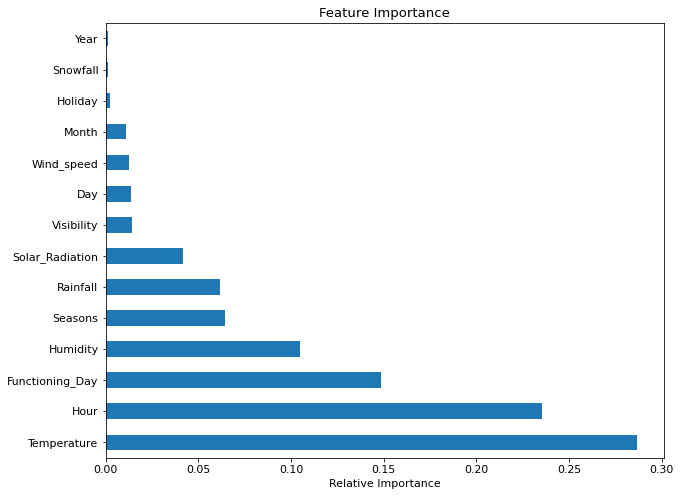

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(14).plot(kind='barh')
plt.xlabel('Relative Importance')

plt.show()

# Implementing Extreme Gradient Boosting

In [ ]:
import xgboost as xgb

In [ ]:
reg3 = xgb.XGBRegressor(n_estimators = 100,reg_lambda=1,gamma=0,max_depth =3)

In [ ]:
reg3 = xgb.XGBRegressor(booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)

In [ ]:
reg3.fit(X_train,y_train)

[16:15:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.004, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
reg3.score(X_train,y_train)

0.9740836677745246

In [ ]:
y_pred3_t = reg3.predict(X_train)

In [ ]:
print('MAE :',mean_absolute_error(y_train**2,y_pred3_t**2))
print('MSE :',mean_squared_error(y_train**2,y_pred3_t**2))
print('r_square :',r2_score( y_train**2,y_pred3_t**2))
print("Adjusted R2 : ",1-(1-r2_score((y_train**2), (y_pred3_t**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MAE : 72.02930503771624
MSE : 14353.513718216669
r_square : 0.9654334618411727
Adjusted R2 :  0.965359305938372


In [ ]:
y_pred3 =reg3.predict(X_test)

In [ ]:
print('MAE :',mean_absolute_error(y_test**2,y_pred3**2))
print('MSE :',mean_squared_error(y_test**2,y_pred3**2))
print('r_square :',r2_score(y_test**2,y_pred3**2))
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred3**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE : 124.6792625943458
MSE : 44743.66369435439
r_square : 0.8930914007303715
Adjusted R2 :  0.8921676513127192


In [ ]:
importances = reg3.feature_importances_

In [ ]:
importances =importances[1:]

In [ ]:
importances

array([0.06413997, 0.03071461, 0.02108287, 0.00402605, 0.00389452,
       0.01273663, 0.08333772, 0.01047409, 0.11379019, 0.00849753,
       0.5748919 , 0.03777486, 0.01778995, 0.01684915], dtype=float32)

In [ ]:
indices = np.argsort(importances)

In [ ]:
features = df.drop(labels=['Rented_Bike_Count','Date'],axis=1).columns

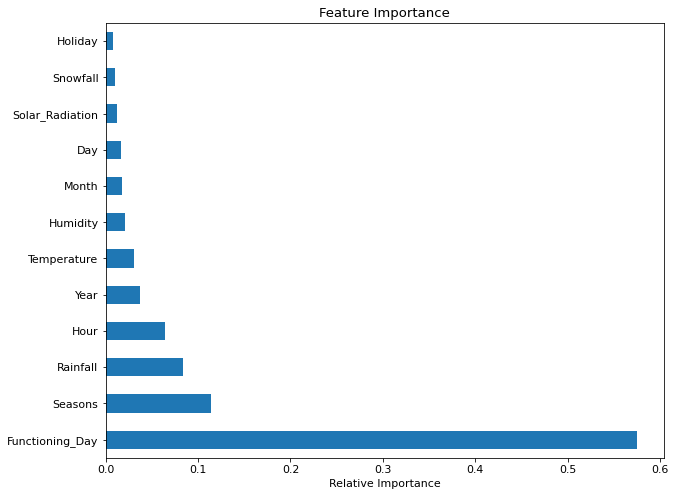

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')

feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(12).plot(kind='barh')
plt.xlabel('Relative Importance')

plt.show()

In Xgboost models we can find that features like Functioning Day has highest importance.

##<u> **Grid Search CV on XGboost algorithm**





In [112]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [113]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,6,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [114]:
#fitting the data
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
reg_gs.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[09:12:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[09:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.0min finished


[09:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 6, 40],
                         'max_depth': [7, 9, 11],
 

In [115]:
#best parameters of XGboost
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [116]:
#assigning best estimators to variable
reg_optimal_model =reg_gs.best_estimator_

In [117]:
#train and test predicted values
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [118]:
#optimal model score of test data
reg_optimal_model.score(X_test,y_test)

0.9526978260313239

In [119]:
#optimal model score of train data
reg_optimal_model.score(X_train, y_train)

0.9504205079570948

In [123]:
print('MAE :',mean_absolute_error(y_train**2,train_preds**2))
print('MSE :',mean_squared_error(y_train**2,train_preds**2))
RMSE = np.sqrt(mean_squared_error(y_train**2,train_preds**2))
print("RMSE :" ,RMSE)
print('r_square :',r2_score( y_train**2,train_preds**2))
print("Adjusted R2 : ",1-(1-r2_score((y_train**2), (train_preds**2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MAE : 99.2686809475296
MSE : 26764.08051098451
RMSE : 163.59731205305457
r_square : 0.935545983483143
Adjusted R2 :  0.9354077097062905


In [124]:
print('MAE :',mean_absolute_error(y_test**2,test_preds**2))
print('MSE :',mean_squared_error(y_test**2,test_preds**2))
RMSE = np.sqrt(mean_squared_error(y_test**2,test_preds**2))
print("RMSE :" ,RMSE)
print('r_square :',r2_score(y_test**2,test_preds**2))
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (test_preds**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE : 95.49745702168042
MSE : 25252.335405933347
RMSE : 158.9098342014532
r_square : 0.9396631481727363
Adjusted R2 :  0.9391418044069477


# Model Summary

## Model Summary for Train Data

In [125]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','174434.29073013217','417.6177272373604','0.5799939856107544','0.5790929429597478'])
train.add_row(['2','Lasso Regression','174434.29073013217','417.6533140418404','0.5799224019217912','0.5790212057016577'])
train.add_row(['3','Ridge Regression' ,'174405.84663111053','417.619260368952',' 0.5799909018064554','0.5790898525397359'])
train.add_row(['4','DecisionTree Regressor','144263.35839192313','379.82016585737404','0.6525808954746626','0.6518355741691877'])
train.add_row(['5','XGBRegressor','26764.08051098451','163.59731205305457','0.935545983483143','0.9354077097062905'])

print(train)

+-------+------------------------+--------------------+--------------------+---------------------+--------------------+
| SL NO |       MODEL_NAME       |     Train MSE      |     Train RMSE     |      Train R^2      | Train Adjusted R^2 |
+-------+------------------------+--------------------+--------------------+---------------------+--------------------+
|   1   |   Linear Regression    | 174434.29073013217 | 417.6177272373604  |  0.5799939856107544 | 0.5790929429597478 |
|   2   |    Lasso Regression    | 174434.29073013217 | 417.6533140418404  |  0.5799224019217912 | 0.5790212057016577 |
|   3   |    Ridge Regression    | 174405.84663111053 |  417.619260368952  |  0.5799909018064554 | 0.5790898525397359 |
|   4   | DecisionTree Regressor | 144263.35839192313 | 379.82016585737404 |  0.6525808954746626 | 0.6518355741691877 |
|   5   |      XGBRegressor      | 26764.08051098451  | 163.59731205305457 |  0.935545983483143  | 0.9354077097062905 |
+-------+------------------------+------

## Model Summary for Test Data

In [126]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','174942.33509641566','418.261084845836','0.5820002553685468','0.5783885064229985'])
test.add_row(['2','Lasso Regression','174974.15623376577','418.29912291775815','0.5819242233018724','0.5783118173972227'])
test.add_row(['3','Ridge Regression ','174943.79254949375','418.2628271188987','0.581996772992402','0.5783849939571981'])
test.add_row(['4','DecisionTree Regressor','150321.32417112263','387.71294042257944','0.6408286474422477','0.6377252083360458'])
test.add_row(['5','XGBRegressor','25252.335405933347','158.9098342014532','0.9396631481727363','0.9391418044069477'])

print(test)

+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 174942.33509641566 |  418.261084845836  | 0.5820002553685468 | 0.5783885064229985 |
|   2   |    Lasso Regression    | 174974.15623376577 | 418.29912291775815 | 0.5819242233018724 | 0.5783118173972227 |
|   3   |   Ridge Regression     | 174943.79254949375 | 418.2628271188987  | 0.581996772992402  | 0.5783849939571981 |
|   4   | DecisionTree Regressor | 150321.32417112263 | 387.71294042257944 | 0.6408286474422477 | 0.6377252083360458 |
|   5   |      XGBRegressor      | 25252.335405933347 | 158.9098342014532  | 0.9396631481727363 | 0.9391418044069477 |
+-------+------------------------+--------------